In [3]:
import numpy as np
import pandas as pd
import re
from datetime import datetime as dt
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager import DataManager
# path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Calibrator\\')
# sys.path.append(path_file)
# from calibrator import Calibrator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

In [127]:
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager import DataManager

In [151]:
path_general = 'D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Vaisala\\2023\\Noviembre\\'


#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_total = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_total.append(load_file)
df_total = pd.concat(df_total)

In [152]:
df_total.reset_index(inplace=True, drop=True)

In [161]:
df_total.head(5)

,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa)
Date,,,,,,,
2023-10-01 00:00:00,151.6,1259.3,-4.0,49.7,24.9,70.1,850.6
2023-10-01 00:01:00,152.6,1257.2,0.8,49.2,24.8,70.5,850.6
2023-10-01 00:02:00,152.6,1247.2,0.6,49.2,24.7,71.3,850.7
2023-10-01 00:03:00,154.3,1240.4,-4.2,50.5,24.7,73.1,850.7
2023-10-01 00:04:00,156.2,1241.7,0.2,50.7,24.6,73.2,850.8


In [150]:
type(df_total.index[0])

str

In [160]:
df_total = df_total[df_total.index.month == 10]

In [154]:
df_total['Date'] = (df_total['Date'].str[:10] +' ' +df_total['Date'].str[11:17] +'00')

In [155]:
df_total['Date']=pd.to_datetime(df_total['Date'])

In [156]:
df_total.drop('Uptime (s)',axis=1,inplace=True)

In [157]:
df_total.dropna(axis=0,inplace=True)

In [158]:
df_total.set_index('Date', inplace=True, drop=True)

In [162]:
Datamanager = DataManager(dataframe = df_total)
df_vaisala = Datamanager.load_data()

entre


In [163]:
Datamanager.show_period(df_vaisala)

La fecha inical del conjunto de datos es 2023-10-01 00:00:00
La fecha final del conjunto de datos es 2023-10-31 23:59:00
La frecuencia del registro de datos es de cada 1 minutos
El rango de datos es de: 30 days 23:59:00
El dataset tiene en total 44512 registros 
El dataset no tiene datos repetidos
Los datos están incompletos, hay que reindexar
Los datos faltantes son
2023-10-01 01:54:00
2023-10-01 19:49:00
2023-10-02 13:54:00
2023-10-03 07:27:00
2023-10-03 19:17:00
2023-10-03 19:18:00
2023-10-03 19:19:00
2023-10-03 19:20:00
2023-10-03 19:21:00
2023-10-03 19:22:00
2023-10-03 19:23:00
2023-10-03 19:24:00
2023-10-03 19:25:00
2023-10-03 19:26:00
2023-10-03 19:27:00
2023-10-03 19:28:00
2023-10-03 19:29:00
2023-10-03 19:30:00
2023-10-03 19:31:00
2023-10-03 19:32:00
2023-10-03 19:33:00
2023-10-03 19:34:00
2023-10-03 19:35:00
2023-10-03 19:36:00
2023-10-03 19:37:00
2023-10-03 19:38:00
2023-10-03 19:39:00
2023-10-03 19:40:00
2023-10-03 19:41:00
2023-10-03 19:42:00
2023-10-03 19:43:00
2023-10-03

,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa)
2023-10-01 00:00:00,151.6,1259.3,-4.0,49.7,24.9,70.1,850.6
2023-10-01 00:01:00,152.6,1257.2,0.8,49.2,24.8,70.5,850.6
2023-10-01 00:02:00,152.6,1247.2,0.6,49.2,24.7,71.3,850.7
2023-10-01 00:03:00,154.3,1240.4,-4.2,50.5,24.7,73.1,850.7
2023-10-01 00:04:00,156.2,1241.7,0.2,50.7,24.6,73.2,850.8
2023-10-01 00:05:00,156.2,1242.8,-2.2,50.4,24.5,72.1,850.8
2023-10-01 00:06:00,156.2,1238.1,1.2,47.6,24.4,71.4,850.8
2023-10-01 00:07:00,156.2,1232.9,-2.8,49.9,24.4,72.3,850.8
2023-10-01 00:08:00,153.5,1218.9,1.2,47.5,24.4,70.9,850.8
2023-10-01 00:09:00,152.6,1205.9,-0.4,48.9,24.4,72.3,850.8


In [33]:
path_save = 'D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Vaisala\\Resultados\\'

In [167]:
def graphic(data=pd.DataFrame(), variable='CO', unit='ppm', labelsize=12,
            shape_figs=(1, 1), position=[0, 0], color='#056674', fig=None):
    """
    Generate one or more plots in a single mosaic.
    
    Arguments:
    * ``data`` : DataFrame with the data.
    * ``variable`` : Variable to plot.
    * ``unit`` : Units of the variable.
    * ``labelsize`` : Font size.
    * ``shape_figs`` : Shape of the figure matrix in the form i,j. Default is (1,1).
    * ``position`` : Position of the figure in the matrix in the form i,j. Default is [0,0].
    * ``color`` : Color of the time series curve. Default is #056674.
    * ``fig`` : Matplotlib figure object.
    
    Returns:
    * ``fig`` : Figure.
    """
    if fig is None:
        fig = plt.figure(figsize=(10, 6))

    gs = gridspec.GridSpec(shape_figs[0], shape_figs[1])

    ax1 = fig.add_subplot(gs[position[0], position[1]])

    minvar = data[variable].min()
    maxvar = data[variable].max()
    
    if minvar < 0:
        minvar = 0

    min_x = data[variable].idxmin()
    min_y = round(minvar, 2)
    
    max_x = data[variable].idxmax()
    max_y = round(maxvar, 2)

    ax1.scatter(min_x, min_y, c='k', label='Minimo')
    ax1.scatter(max_x, max_y, c='r', label='Maximo')

    ax1.annotate(f'{min_y}', xy=(min_x, min_y), xytext=(0, -20), textcoords="offset points", ha='center')
    ax1.annotate(f'{max_y}', xy=(max_x, max_y), xytext=(10, 10), textcoords="offset points", ha='center')

    ax1.plot(data.index, data[variable], '-', lw=1, label=variable, color=color)

    ax1.set_ylim([(minvar) * 0.99, (maxvar) * 1.01])
    ax1.set_xlim([data.index[0], data.index[-1]])

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax1.tick_params(axis='y', color='k', labelcolor='k', labelsize=labelsize)
    ax1.tick_params(axis='x', color='k', labelcolor='k', labelsize=labelsize)

    ax1.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax1.set_title(variable, fontsize=14, color='k')
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))

    ax1.set_ylabel(f"{unit}", fontsize=labelsize, color='k')
    ax1.set_xlabel("Tiempo", fontsize=labelsize, color='k')
    
    plt.legend(loc=0)

#     plt.grid(False)

    return fig

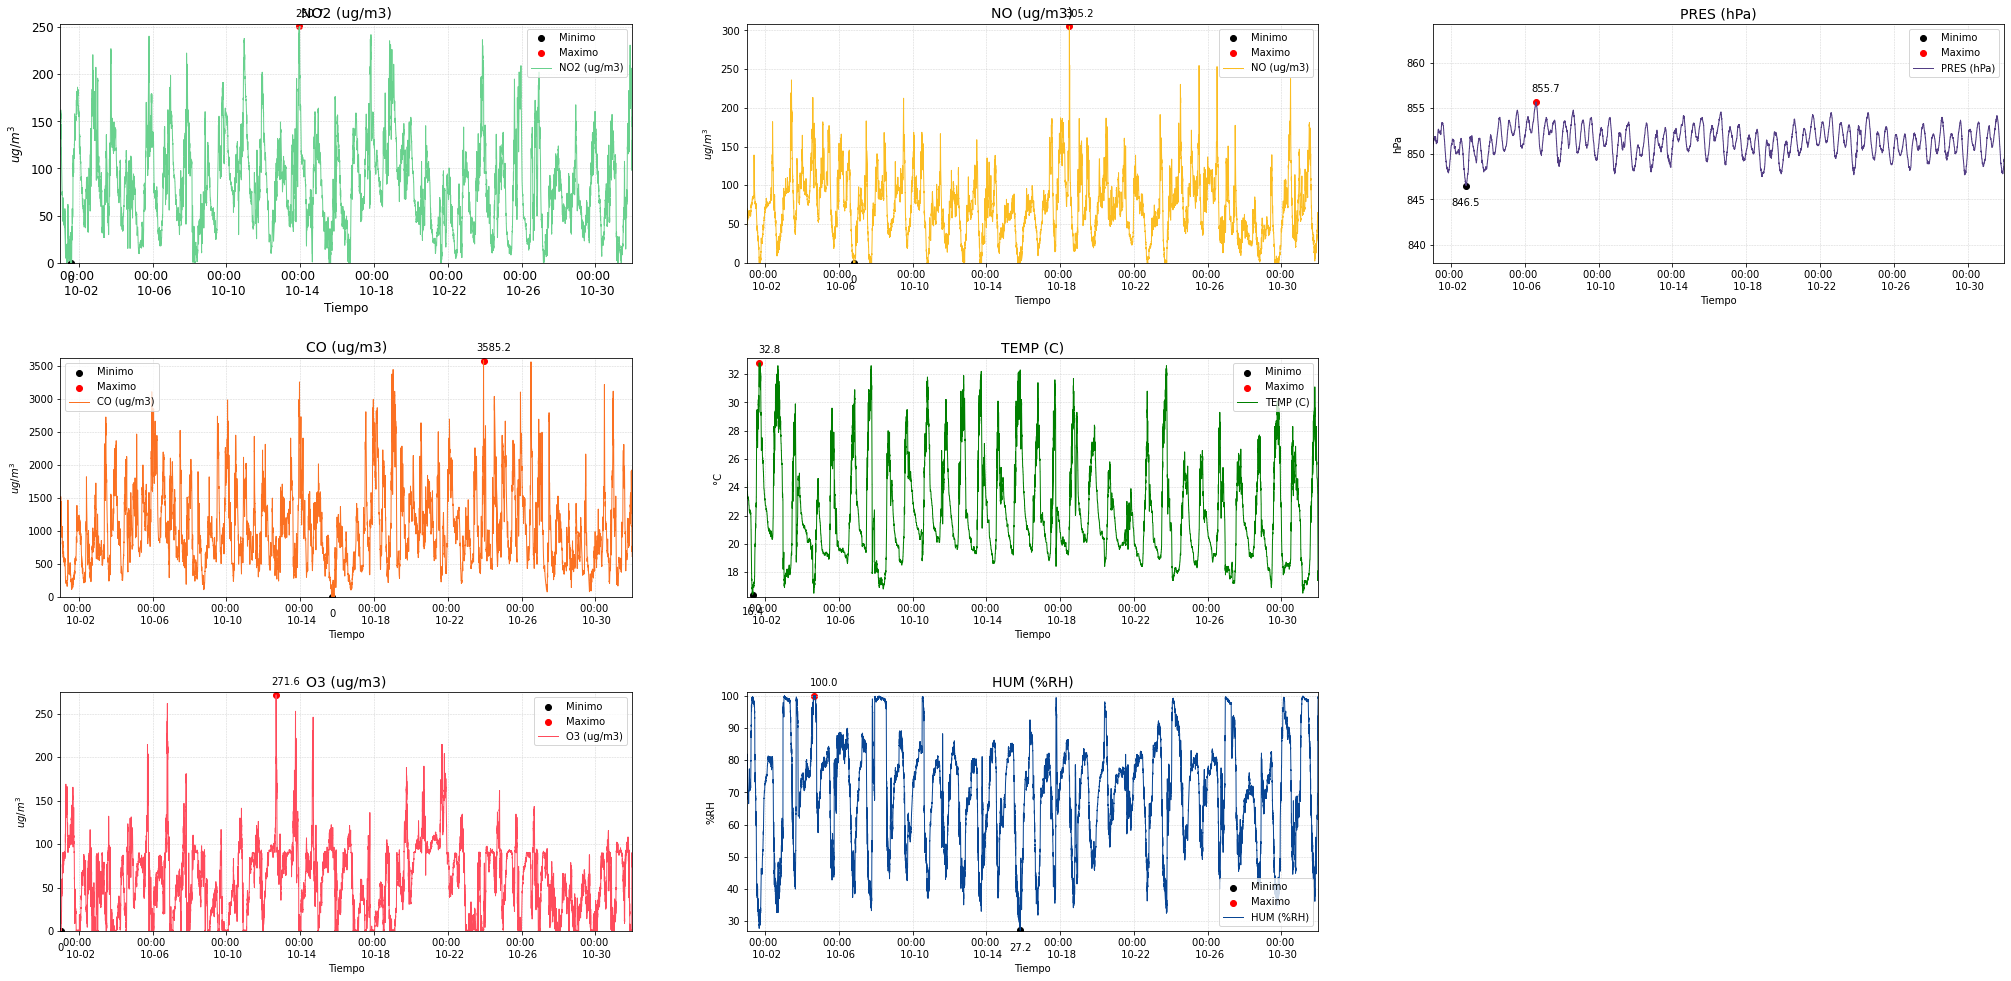

In [174]:
fig = plt.figure(figsize=(10,6))
# gs = gridspec.GridSpec(3,3)

serie_NO2=graphic(data=df_vaisala,variable='NO2 (ug/m3)',unit=r'$ug/m^3$',fig=fig,color='#69D18E',
                              labelsize = 12,shape_figs = (3,3),position=[0,0])
serie_CO=graphic(data=df_vaisala,variable='CO (ug/m3)',unit=r'$ug/m^3$',fig=fig,color='#FB7122',
                             labelsize = 10,shape_figs=(3,3),position=[1,0])
serie_O3=graphic(data=df_vaisala,variable='O3 (ug/m3)',unit=r'$ug/m^3$',fig=fig,color='#FF4B5C',
                             labelsize = 10,shape_figs=(3,3),position=[2,0])
serie_NO=graphic(data=df_vaisala,variable='NO (ug/m3)',unit=r'$ug/m^3$',fig=fig,color='#FBBD22',
                             labelsize = 10,shape_figs=(3,3),position=[0,1])
serie_temp=graphic(data=df_vaisala,variable='TEMP (C)',unit=r'°C',fig=fig,color='green',
                               labelsize = 10,shape_figs=(3,3),position=[1,1])
serie_hum=graphic(data=df_vaisala,variable='HUM (%RH)',unit=r'%RH',fig=fig,color='#084594',
                              labelsize = 10,shape_figs=(3,3),position=[2,1])
serie_pres=graphic(data=df_vaisala,variable='PRES (hPa)',unit=r'hPa',fig=fig,color='#533E85',
                               labelsize = 10,shape_figs=(3,3),position=[0,2])

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.8,top=2.2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Serie_Vaisala_Oct2023.jpg',bbox_inches="tight",dpi = 200)

In [170]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

def histogram(data, variable, unit='', bins=10, kde=True, color_hist='#0E8388',
              color_kde='#2C3333', shape_figs=(1, 1), position=[0, 0],
              fig=plt.figure(figsize=(10, 6)), labelsize=10):
    """
    Plot the histogram of the variable. Generates a simple plot for quick visualization of the variable.

    Arguments:
    * ``data`` : DataFrame with the data.
    * ``variable`` : Name of the variable.
    * ``unit`` : Unit of the variable.
    * ``bins`` : Number of bins for the histogram.
    * ``kde``: Whether to plot the kernel density estimate (KDE). Default is True.
    * ``color_hist`` : Color for the histogram bars.
    * ``color_kde`` : Color for the KDE curve.
    * ``labelsize`` : Font size.
    * ``shape_figs`` : Shape of the figure matrix.
    * ``position`` : Position of the figure in the matrix.
    * ``fig`` : Matplotlib figure object.

    Returns:
    * ``fig`` : Figure.
    """
    gs = gridspec.GridSpec(shape_figs[0], shape_figs[1])
    ax = fig.add_subplot(gs[position[0], position[1]])

    datos = data[variable]
    plt.hist(datos.dropna(), bins=bins, density=True, label=variable, color=color_hist, edgecolor="white")
    if kde:
        sns.kdeplot(datos, alpha=0.8, linewidth=2, color=color_kde, label= "KDE")

    ax.axvline(np.percentile(datos.dropna(), 50), color='#2E4F4F', ls="--", lw=1.5, label='Mediana')
    ax.tick_params(axis='y', color='black', labelcolor='black', labelsize=labelsize)
    ax.tick_params(axis='x', which='both', color='black', labelcolor='black', labelsize=labelsize)
    ax.set_xlabel(f"{unit}", fontsize=labelsize, color='black')
    ax.set_ylabel("Densidad", fontsize=labelsize, color='black')
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.set_title(variable, fontsize=14, color='k')
    plt.legend(loc=0, fontsize=labelsize)

    return fig


<Figure size 720x432 with 0 Axes>

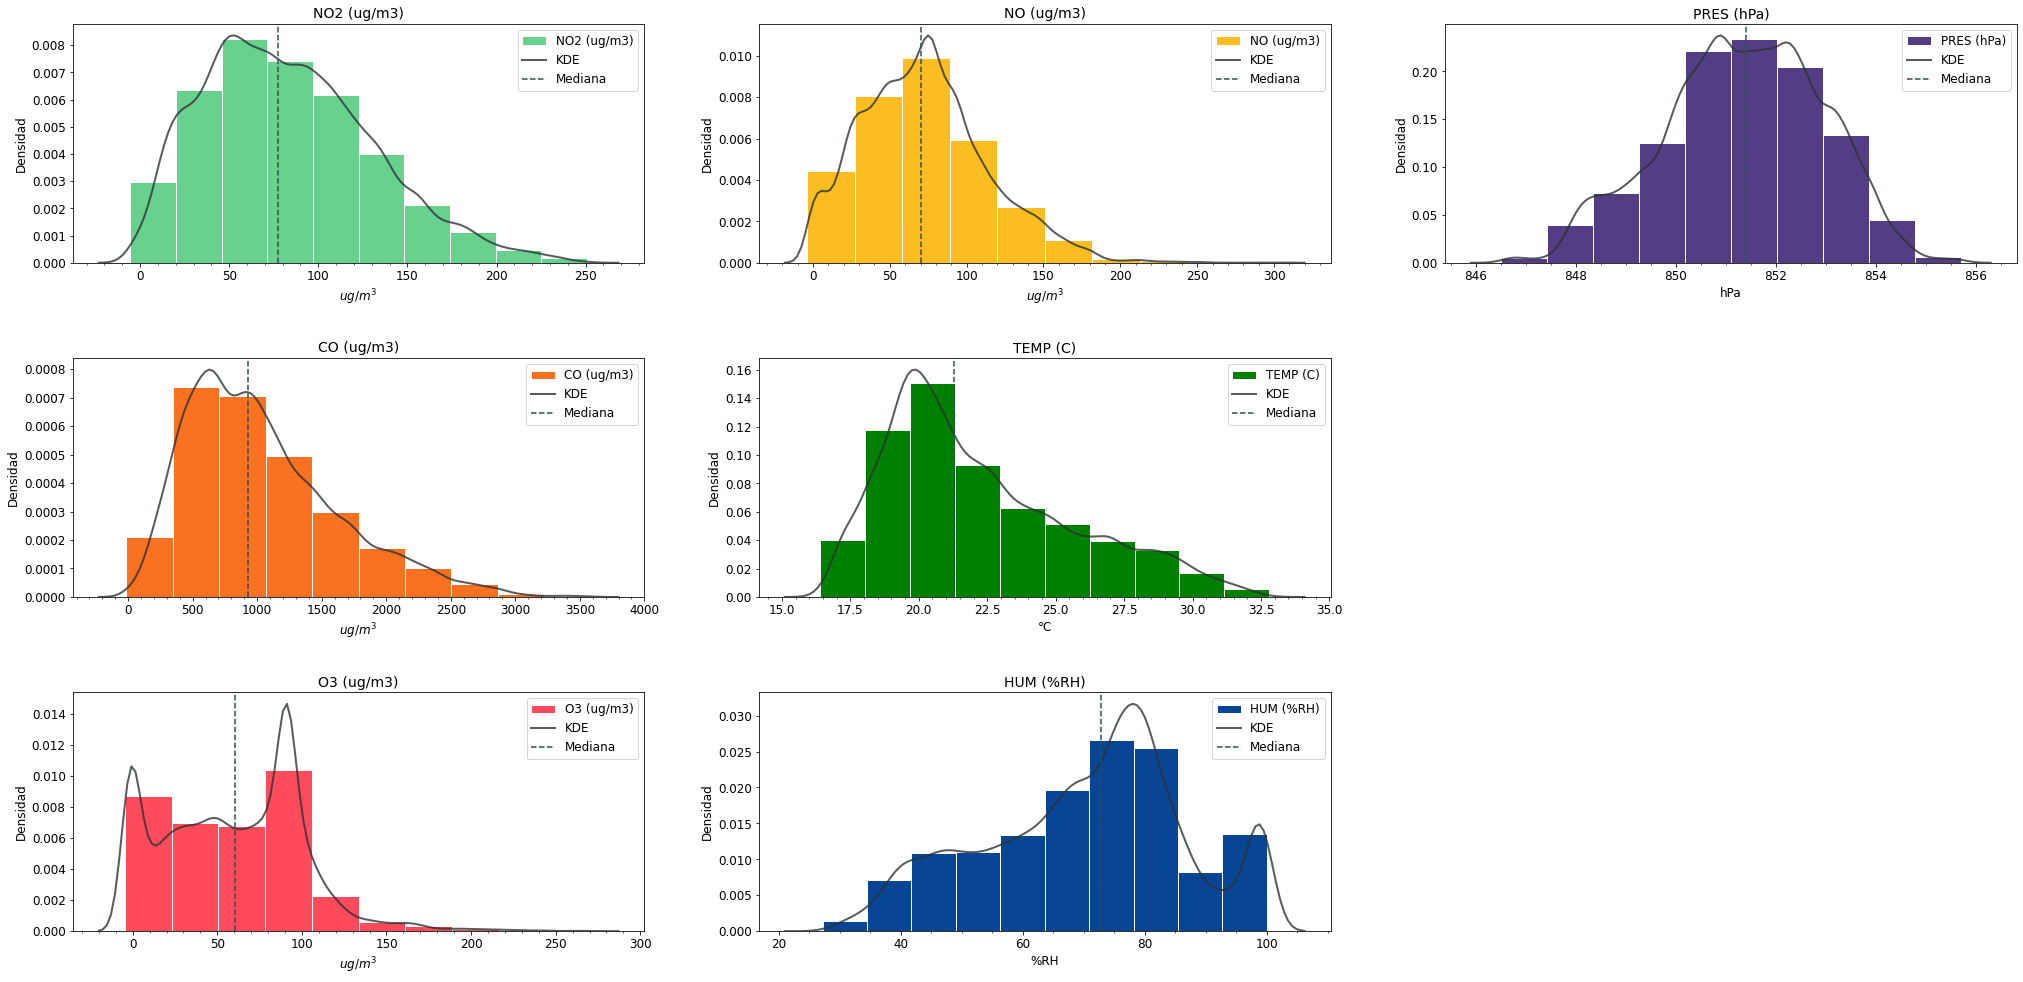

In [173]:
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(3,3)

hist_NO2=histogram(data=df_vaisala,variable='NO2 (ug/m3)',unit=r'$ug/m^3$',fig = fig,color_hist = '#69D18E',
                               labelsize = 12,shape_figs=(3,3),position=[0,0])
hist_CO=histogram(data=df_vaisala,variable='CO (ug/m3)',unit=r'$ug/m^3$',fig = fig,color_hist = '#FB7122',
                              labelsize = 12,shape_figs=(3,3),position=[1,0])
hist_O3=histogram(data=df_vaisala,variable='O3 (ug/m3)',unit=r'$ug/m^3$',fig = fig,color_hist = '#FF4B5C',
                              labelsize = 12,shape_figs=(3,3),position=[2,0])
hist_NO=histogram(data=df_vaisala,variable='NO (ug/m3)',unit=r'$ug/m^3$',fig = fig,color_hist = '#FBBD22',
                              labelsize = 12,shape_figs=(3,3),position=[0,1])
hist_temp=histogram(data=df_vaisala,variable='TEMP (C)',unit=r'°C',fig = fig,color_hist = 'green',
                                labelsize = 12,shape_figs=(3,3),position=[1,1])
hist_hum=histogram(data=df_vaisala,variable='HUM (%RH)',unit=r'%RH',fig = fig,color_hist = '#084594',
                               labelsize = 12,shape_figs=(3,3),position=[2,1])
hist_pres=histogram(data=df_vaisala,variable='PRES (hPa)',unit=r'hPa',fig = fig,color_hist = '#533E85',
                                labelsize = 12,shape_figs=(3,3),position=[0,2])

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.8,top=2.2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Histo_Vaisala_Oct2023.jpg',bbox_inches="tight",dpi = 200)